## **Support Vector Machines**

### **Import necessary libraries**

In [1]:
import os 
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

### **Prepare train, test data**

In [2]:
train_df = pd.read_csv('../data/train_data.csv')
test_df = pd.read_csv('../data/test_data.csv')

In [3]:
X_train = train_df.drop(columns=['diabetes'])
y_train = train_df['diabetes']
X_test = test_df.drop(columns=['diabetes'])
y_test = test_df['diabetes']

### **Initialize model**

In [4]:
model = SVC(random_state=42)

In [5]:
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [6]:
y_pred = model.predict(X_test)

In [7]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], shape=(19994,))

Accuracy:  0.9652395718715615
Recall:  0.6005882352941176
Precision:  0.9845708775313404
F1 Score:  0.7460723419802704


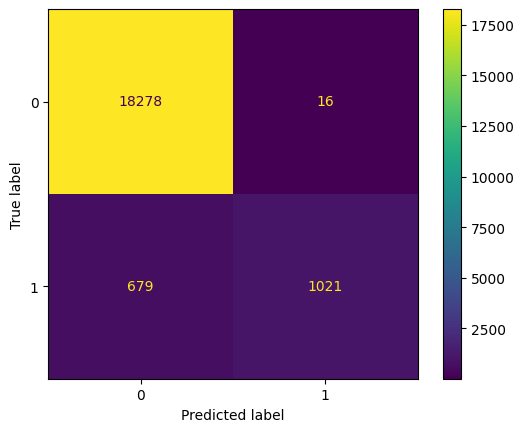

In [8]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

### **Fine-tune hyperparameters**

In [9]:
finetuned_model = SVC(random_state=42)

In [10]:
# params_grid = {
#     'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
#     'kernel': ['rbf'],
#     'gamma': ['scale', 'auto'],
#     'class_weight': [None, 'balanced'],
#     'shrinking': [False, True]
# }

# grid = GridSearchCV(finetuned_model, params_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)
# grid.fit(X_train, y_train)

In [11]:
# print("Best parameters:", grid.best_params_)
# print("Best CV score:", grid.best_score_)

We found the best params is `{'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': False}`

In [12]:
best_model = SVC(
    C=10,
    class_weight=None,
    gamma="scale",
    kernel="rbf",
    shrinking=False,
)

In [13]:
best_model.fit(X_train, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,False
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
best_y_pred = best_model.predict(X_test)

Accuracy:  0.9689906972091628
Recall:  0.6547058823529411
Precision:  0.9712041884816754
F1 Score:  0.7821503865073788


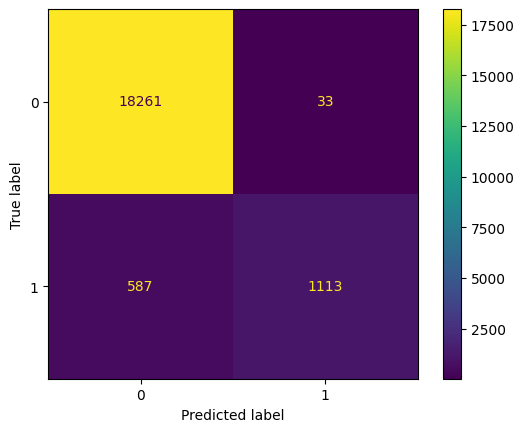

In [15]:
print("Accuracy: ", accuracy_score(y_test, best_y_pred))
print("Recall: ", recall_score(y_test, best_y_pred))
print("Precision: ", precision_score(y_test, best_y_pred))
print("F1 Score: ", f1_score(y_test, best_y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, best_y_pred)).plot()